In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mtrain.smallnet.unet.extract import (
    extract_images_and_masks,
    show_extracted_dataset,
    collapse_to_binary_dataset,
    create_crops_from_extracted,
    collate,
)
from pathlib import Path

In [3]:
TACO_DIR = Path("/Users/hariomnarang/Desktop/personal/TACO/data")
ANN_FILE = TACO_DIR / "annotations.json"
OUT = Path("/tmp/test-extract-01")
extract_images_and_masks(
    ann_file=ANN_FILE, taco_dir=TACO_DIR, output_path=OUT, num_samples=100
)

output directory exists at /tmp/test-extract-01, nuking
CACHE MISS: triggering data generation
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Starting image and mask extraction
EXTRACT; CHUNK=0: 0%
EXTRACT; CHUNK=5: 0%
EXTRACT; CHUNK=0: 10%
EXTRACT; CHUNK=1: 0%
EXTRACT; CHUNK=2: 0%
EXTRACT; CHUNK=3: 0%
EXTRACT; CHUNK=7: 0%
EXTRACT; CHUNK=4: 0%
EXTRACT; CHUNK=5: 10%
EXTRACT; CHUNK=6: 0%
EXTRACT; CHUNK=2: 10%
EXTRACT; CHUNK=0: 20%
EXTRACT; CHUNK=3: 10%
EXTRACT; CHUNK=7: 10%
EXTRACT; CHUNK=6: 10%
EXTRACT; CHUNK=0: 30%
EXTRACT; CHUNK=1: 10%
EXTRACT; CHUNK=6: 20%
EXTRACT; CHUNK=5: 20%
EXTRACT; CHUNK=3: 20%
EXTRACT; CHUNK=2: 20%
EXTRACT; CHUNK=6: 30%
EXTRACT; CHUNK=4: 10%
EXTRACT; CHUNK=3: 30%
EXTRACT; CHUNK=1: 20%
EXTRACT; CHUNK=5: 30%
EXTRACT; CHUNK=1: 30%
EXTRACT; CHUNK=0: 40%
EXTRACT; CHUNK=4: 20%
EXTRACT; CHUNK=4: 30%
EXTRACT; CHUNK=6: 40%
EXTRACT; CHUNK=5: 40%
EXTRACT; CHUNK=7: 20%
EXTRACT; CHUNK=2: 30%
EXTRACT; CHUNK=0: 50%
EXTRACT; CHUNK=1: 40%
EXT

In [5]:
binary_dir = Path("/tmp/tests-binary-extract-02")
collapse_to_binary_dataset(Path("/tmp/test-extract-01"), binary_dir, 0)

output directory /tmp/tests-binary-extract-02 exists, nuking
Original codes: ['background', 'Aluminium foil', 'Battery', 'Aluminium blister pack', 'Carded blister pack', 'Other plastic bottle', 'Clear plastic bottle', 'Glass bottle', 'Plastic bottle cap', 'Metal bottle cap', 'Broken glass', 'Food Can', 'Aerosol', 'Drink can', 'Toilet tube', 'Other carton', 'Egg carton', 'Drink carton', 'Corrugated carton', 'Meal carton', 'Pizza box', 'Paper cup', 'Disposable plastic cup', 'Foam cup', 'Glass cup', 'Other plastic cup', 'Food waste', 'Glass jar', 'Plastic lid', 'Metal lid', 'Other plastic', 'Magazine paper', 'Tissues', 'Wrapping paper', 'Normal paper', 'Paper bag', 'Plastic film', 'Six pack rings', 'Garbage bag', 'Other plastic wrapper', 'Single-use carrier bag', 'Polypropylene bag', 'Crisp packet', 'Spread tub', 'Tupperware', 'Disposable food container', 'Foam food container', 'Other plastic container', 'Plastic glooves', 'Plastic utensils', 'Pop tab', 'Rope & strings', 'Scrap metal', 'S

In [6]:
# repeat for testing
extract_images_and_masks(
    ann_file=ANN_FILE, taco_dir=TACO_DIR, output_path=OUT, num_samples=20
)

binary_dir2 = Path("/tmp/tests-binary-extract-02-02")
collapse_to_binary_dataset(Path("/tmp/test-extract-01"), binary_dir2, 0)

output directory exists at /tmp/test-extract-01, nuking
CACHE MISS: triggering data generation
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Starting image and mask extraction
EXTRACT; CHUNK=0: 30%
EXTRACT; CHUNK=0: 60%
EXTRACT; CHUNK=0: 100%
EXTRACT; CHUNK=1: 30%
EXTRACT; CHUNK=1: 60%
EXTRACT; CHUNK=1: 100%
EXTRACT; CHUNK=2: 30%
EXTRACT; CHUNK=2: 60%
EXTRACT; CHUNK=2: 100%
EXTRACT; CHUNK=3: 30%
EXTRACT; CHUNK=3: 60%
EXTRACT; CHUNK=3: 100%
EXTRACT; CHUNK=4: 50%
EXTRACT; CHUNK=4: 100%
EXTRACT; CHUNK=5: 50%
EXTRACT; CHUNK=5: 100%
EXTRACT; CHUNK=6: 50%
EXTRACT; CHUNK=6: 100%
EXTRACT; CHUNK=7: 50%
EXTRACT; CHUNK=7: 100%
Copy: /Users/hariomnarang/.mtrain_synth_cache/extract_images_and_masks_ca775480b467ca7e /tmp/test-extract-01
copied files: 41 to /tmp/test-extract-01
output directory /tmp/tests-binary-extract-02-02 exists, nuking
Original codes: ['background', 'Aluminium foil', 'Battery', 'Aluminium blister pack', 'Carded blister pack', 'Other plastic b

In [7]:
CROP_DIR = Path("/tmp/tests-crop-dir-02")
CROP_DIR2 = Path("/tmp/tests-crop-dir-03")
create_crops_from_extracted(ANN_FILE, binary_dir, CROP_DIR, 50, 2)
create_crops_from_extracted(ANN_FILE, binary_dir2, CROP_DIR2, 50, 2)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
CROPS: output directory /tmp/tests-crop-dir-02 exists, nuking
Creating 2 crops from 10 images
50%
100%
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
CROPS: output directory /tmp/tests-crop-dir-03 exists, nuking
Creating 2 crops from 20 images
50%
100%


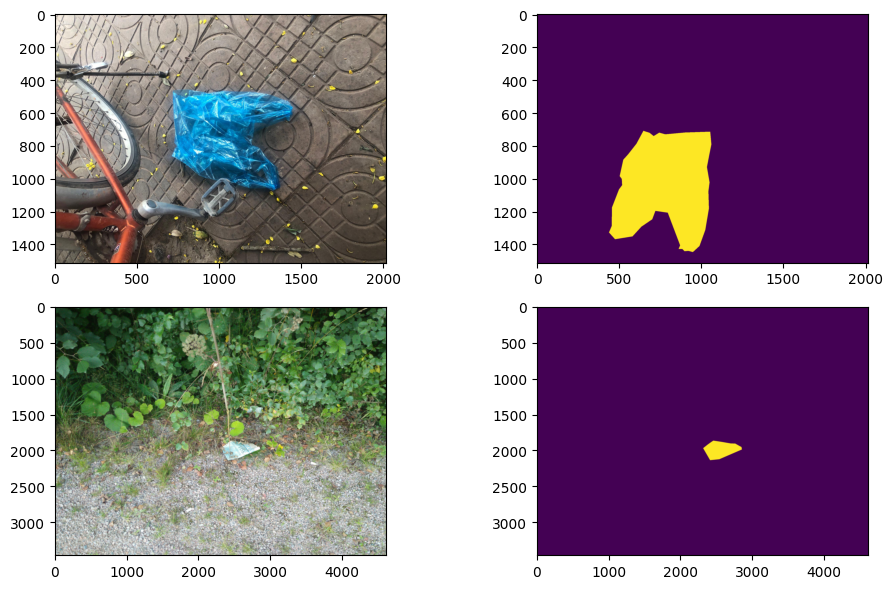

In [8]:
show_extracted_dataset(binary_dir, 2)

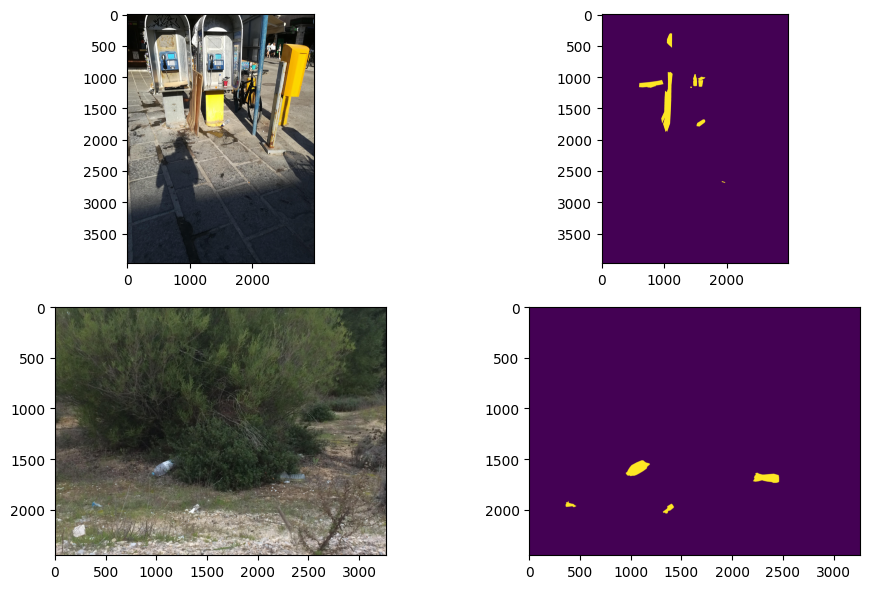

In [9]:
show_extracted_dataset(binary_dir2, 2)

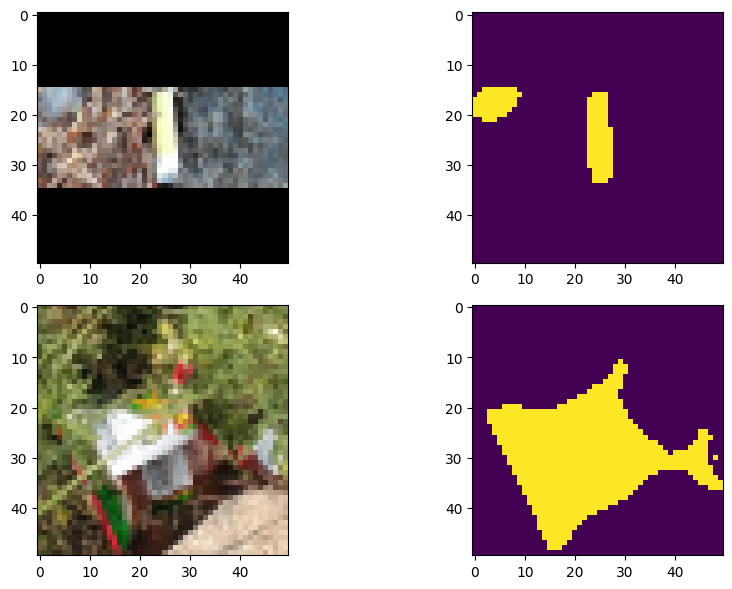

In [10]:
show_extracted_dataset(CROP_DIR, 2)

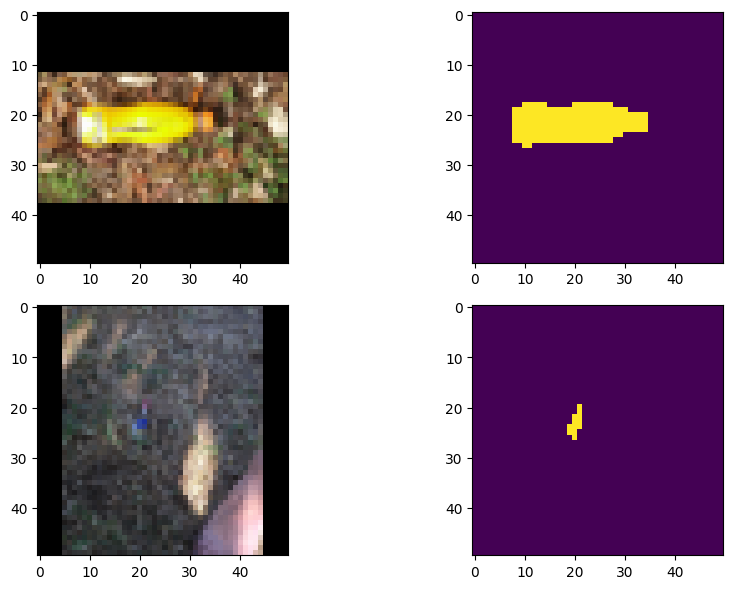

In [11]:
show_extracted_dataset(CROP_DIR2, 2)

In [12]:
COLLATE = Path("/tmp/collate")
collate([CROP_DIR, CROP_DIR2], COLLATE, ["fg", "bg"])

COLLATE: output directory /tmp/collate exists, nuking
Multiple Extraction: 50%


Multiple Extraction: 100%


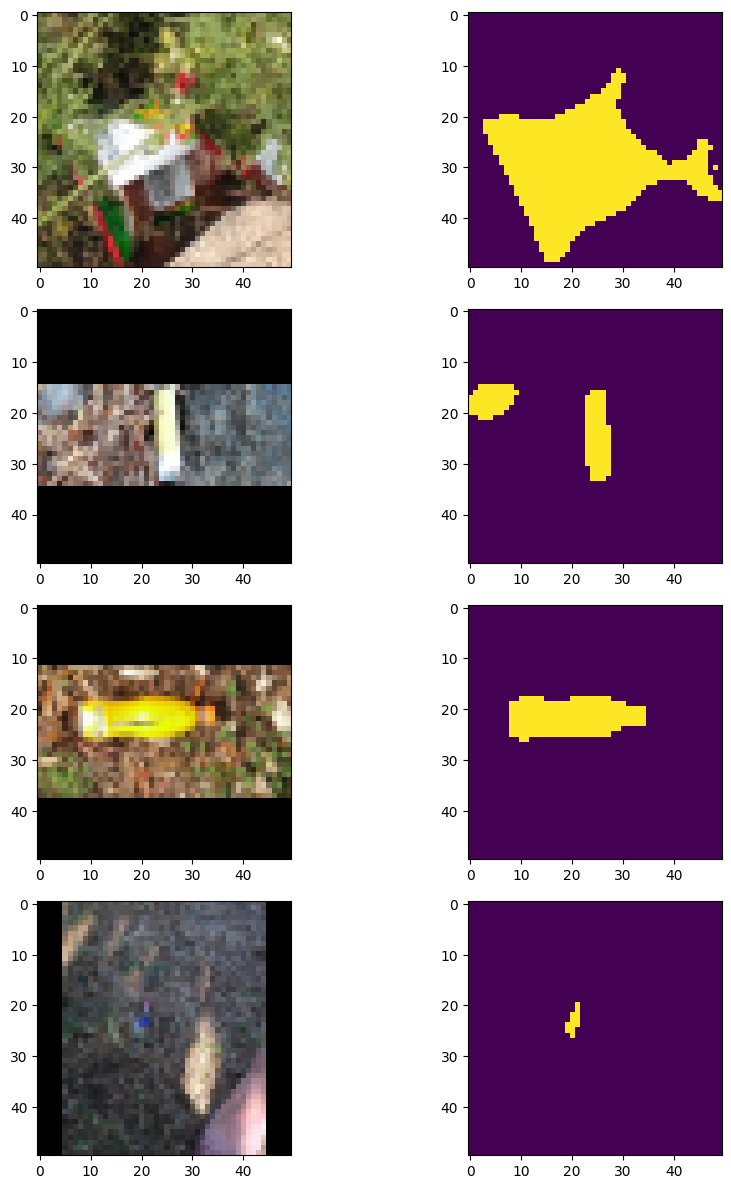

In [13]:
show_extracted_dataset(COLLATE, 4)